### Allan Variance Analysis

In [1]:
# import allantools # ModuleNotFoundError: No module named 'allantools'
# !conda install allantools # PackagesNotFoundError: The following packages are not available from current channels
# !pip install allantools # Successfully installed allantools-2019.9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

In [2]:
df = pd.read_csv('1.csv') # From an iPhone 7
df.info() # The phone was kept almost stationary in my hand

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6618 entries, 0 to 6617
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   loggingTime                             6618 non-null   float64
 1   loggingSample                           6618 non-null   int64  
 2   accelerometerTimestamp_sinceReboot      6618 non-null   float64
 3   accelerometerAccelerationX              6618 non-null   float64
 4   accelerometerAccelerationY              6618 non-null   float64
 5   accelerometerAccelerationZ              6618 non-null   float64
 6   gyroTimestamp_sinceReboot               6618 non-null   float64
 7   gyroRotationX                           6618 non-null   float64
 8   gyroRotationY                           6618 non-null   float64
 9   gyroRotationZ                           6618 non-null   float64
 10  magnetometerTimestamp_sinceReboot       6618 non-null   floa

In [3]:
gyr_time = df['gyroTimestamp_sinceReboot'].values
gyr_data = df[['gyroRotationX', 'gyroRotationY', 'gyroRotationZ']].values
acl_time = df['accelerometerTimestamp_sinceReboot'].values
acl_data = df[['accelerometerAccelerationX', 'accelerometerAccelerationY', 'accelerometerAccelerationZ']].values
gyr_samp_freq = 1 / np.mean(np.diff(gyr_time))
acl_samp_freq = 1 / np.mean(np.diff(acl_time))
del df

In [4]:
def plot_allan_dev(sensor, samp_freq, msg=''):
    taus_in = np.logspace(-3, 4, 80) # tau values (80 of them) from 1e-3 to 1e4
    plt.style.use('dark_background')
    plt.rcParams['axes.grid'] = True
    fig = plt.figure()
    for idx in range(3):
        (taus_out, allan_dev, _, _) = allantools.oadev(sensor[:, idx], rate=samp_freq, data_type="freq", taus=taus_in)
        plt.loglog(taus_out, allan_dev)

    plt.xlabel('Time Cluster (s)')
    plt.ylabel('Allan Deviation')
    plt.title(msg)
    plt.legend(['X', 'Y', 'Z'])
    plt.show()

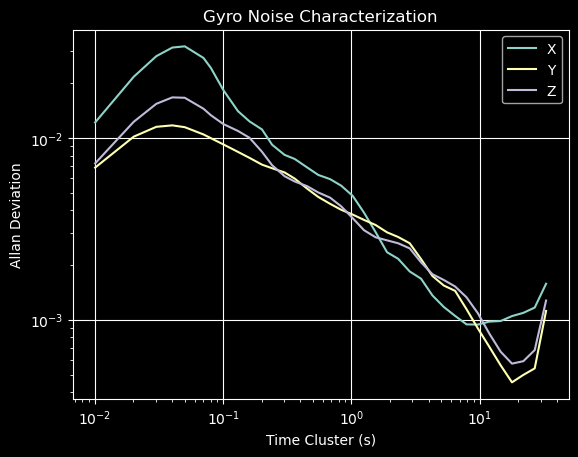

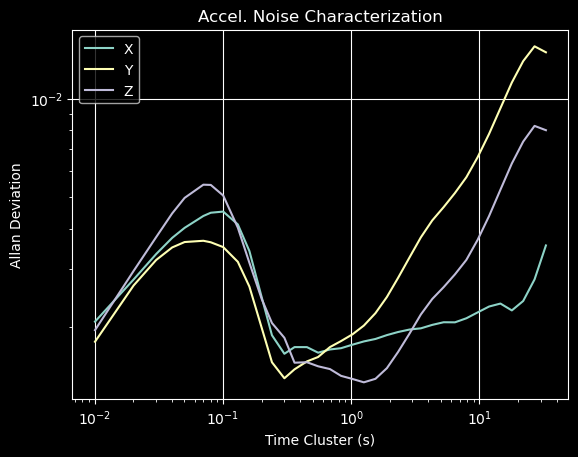

In [5]:
plot_allan_dev(gyr_data, gyr_samp_freq, 'Gyro Noise Characterization')
plot_allan_dev(acl_data, acl_samp_freq, 'Accel. Noise Characterization')